# Appendix
## Joseph Free
## Project 3

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations

## 1. Systematic Permutation

To perform systematic permutation on the data

| A   	| B        	| C              	|
|-----	|----------	|----------------	|
| 6,8 	| 9, 11, 9 	| 17, 15, 16, 16 	|

we implement the following algorithm:

**algorithm**

+ Assign to each observation a unique index ranging from 1 to 9.

+ Generate all partitions of the indices into three groups of size $n_A = 2, n_B = 3, n_C = 4$ by
  + Finding all combinations of 2 indices taken from the 9 for treatment A, and then
  + For each combination of indices for treatment A, finding all possible combinations of 3 indices from the remaining 9-2 = 7 indices for treatment B.
  + Treatment C is then relegated the remaining indices.
+ For the resulting partitions, calculate the equivalent statistic
    
\begin{align*}
T^2 = \frac{T^2_A}{n_a} + \frac{T^2_B}{n_B} + \frac{T^2_C}{n_C}
\end{align*}

+ Calculate the p-value for the randomization test using 

\begin{align*}
    p & = \frac{\{ \# T^2 \ge \text{ original } T^2 \}}{1260} 
\end{align*}

In [2]:
# Assign labels to data points.
data_points = {1:6, 2:8,             # Treatment A
          3:9, 4:11, 5:9,            # Treatment B
          6:17, 7:15, 8:16, 9:16}    # Treatment C

# Initialize array of equivalent statistics.
equivalent_statistics = np.array([])
perms = []

# Initialize list of indices
l = [1,2,3,4,5,6,7,8,9]
# Begin permutations.
# For each combination of values for treatment A....
for permA in list(combinations(l, 2)):
    A_prime = list(permA)
    
    # ....determine which indices remain to be permuted....
    remaining = [value for value in l if value not in A_prime]
    
    # ....From remaining indices, find all combinations of 3 taken from 7 for treatment B
    for permB in list(combinations(remaining, 3)):
            B_prime = list(permB)
            
            # Again determine remaining indices. These are the remaining values relegated to Treatment C.
            remaining = [value for value in remaining if value not in B_prime]
            
            # Calculate statistic for a completed permutation.
            TA = sum([data_points[i] for i in permA])**2/2
            TB = sum([data_points[i] for i in permB])**2/3
            TC = sum([data_points[i] for i in remaining])**2/4
            equivalent_statistics = np.append(equivalent_statistics,TA+TB+TC)
            perms.append(A_prime + B_prime + remaining)


# Calculate p-value for the randomization test.
originalT = equivalent_statistics[0]
numerator = sum( equivalent_statistics >= originalT )
pval = numerator/1260   
print("Randomization p-value: " + str(pval))
print("Original T:" + str(originalT))
print("Number of equivalent statistics: " + str(len(equivalent_statistics)))

Randomization p-value: 0.0007936507936507937
Original T:1402.3333333333333
Number of equivalent statistics: 1260


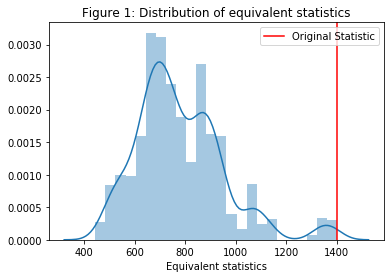

In [3]:
# Distribution of equivalent statistics with original stat. overlaid.
ax = sns.distplot(equivalent_statistics)
ax.set_xlabel("Equivalent statistics")
ax.set_title("Figure 1: Distribution of equivalent statistics")
ax.axvline(originalT, color='red')
ax.legend(["Original Statistic"])
plt.savefig('project 3/fig1.png', format = 'png');

## 2. Random Permutation

To implement random permutation, the following algorithm is used.

**algorithm**

+ Assign to each observation a unique index ranging from 1 to 9.

+ For R = 800 times, do the following:

+ Randomly allocate indices to the first two treatments groups of size $n_A = 2, n_B = 3$ by
  + Randomly selecting two elements of index values from 1 through 9 for treatment A, removing them from the list of indices.
  + For the remaining seven elements, randomly select three elements for treatment B, removing these too from the list.
  + Treatment C is then relegated the remaining indices.
+ For the resulting permutations, calculate the equivalent statistic
    
\begin{align*}
T^2 = \frac{T^2_A}{n_a} + \frac{T^2_B}{n_B} + \frac{T^2_C}{n_C}
\end{align*}

+ Calculate the p-value for the randomization test using 

\begin{align*}
    p & = \frac{\{ \# T^2 \ge \text{ original } T^2 \}}{800} 
\end{align*}

In [4]:
def random_perm(n=800):
    # Assign labels to data points.
    data_points = {1:6, 2:8,             # Treatment A
              3:9, 4:11, 5:9,            # Treatment B
              6:17, 7:15, 8:16, 9:16}    # Treatment C
    l = [1,2,3,4,5,6,7,8,9]
    
    # Calculate original statistic for comparison.
    TA = sum([data_points[i] for i in l[0:2]])**2/2
    TB = sum([data_points[i] for i in l[2:5]])**2/3
    TC = sum([data_points[i] for i in l[5:9]])**2/4
    originalT = TA+TB+TC
    
    # Initialize array to save equivalent stats.
    equivalent_statistics = np.array([])
    for i in range(0,n):
        # Generate indices for random allocation.
        perm = []
        for j in range(8,3,-1):
            perm.append(l.pop(np.random.randint(0,j)))
        
        # Calculate an equivalent statistic.
        TA = sum([data_points[i] for i in perm[0:2]])**2/2
        TB = sum([data_points[i] for i in perm[2:5]])**2/3
        TC = sum([data_points[i] for i in l[5:9]])**2/4
        equivalent_statistics = np.append(equivalent_statistics,TA+TB+TC)
        
        # Reset l
        l = [1,2,3,4,5,6,7,8,9]
        
    # Calculate and return p-value.
    numerator = sum( equivalent_statistics >= originalT )
    pval = numerator/n
    return (pval, equivalent_statistics)

np.random.seed(829)
results = random_perm(800)
print("Randomization p-value: " + str(results[0]))

Randomization p-value: 0.0


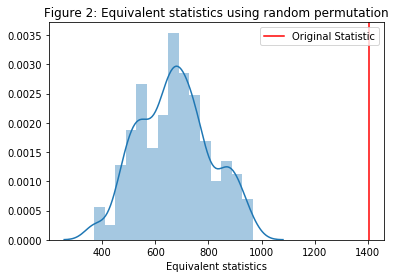

In [5]:
# Plot distribution of random equivalent statistics.
ax = sns.distplot(results[1])
ax.set_xlabel("Equivalent statistics")
ax.set_title("Figure 2: Equivalent statistics using random permutation")
ax.axvline(originalT, color='red')
ax.legend(["Original Statistic"])
plt.savefig('project 3/fig2.png', format = 'png');

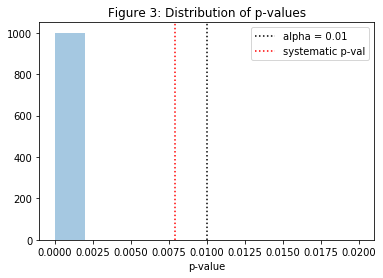

In [6]:
# Run 1000 trials of randomized permutations using size 800.
p = []
for i in range(0,1000):
    p.append(random_perm(800)[0])
ax = sns.distplot(p, bins=10, kde=False, hist_kws={'range':(0,.02)})
ax.set_xlabel("p-value")
ax.axvline(0.01, ls = 'dotted', color='black')
ax.axvline(0.0079, ls = 'dotted', color='red')
ax.set_title("Figure 3: Distribution of p-values");
ax.legend(["alpha = 0.01","systematic p-val"])
plt.savefig('project 3/fig3.png', format = 'png');